# Paquetes para prácticas de visualización 
### Bibliotecas en el "mercado"

Las **bibliotecas**  son estructuras de código que podemos usar en
nuestro propio código.
Su principal ventaja es que ahorramos tiempo y lı́neas de código.
Las **bibliotecas de visualización** nos permiten crear, mostrar y editar
gráficos.

* **matplotlib**
* seaborn
* Bokeh
* Plotly
* ... y otros.

## Además, necesitaremos ...

* Python 3
* Pandas --> dataFrames
* Numpy --> arrays n-dimensionales

## opcional
* jupyter notebook  (recomendado para la elaboración de reportes)

## Visualización de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Customer_Churn_Model.txt")

In [3]:
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

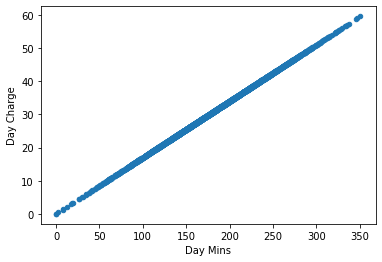

In [4]:
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

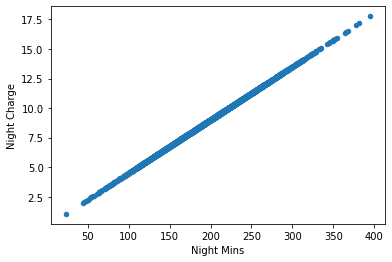

In [5]:
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

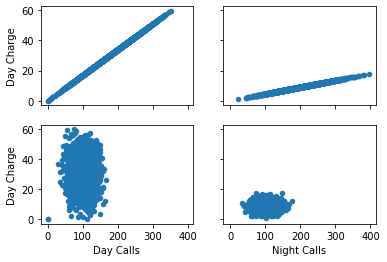

In [6]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y ="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

<AxesSubplot:xlabel='Area Code'>

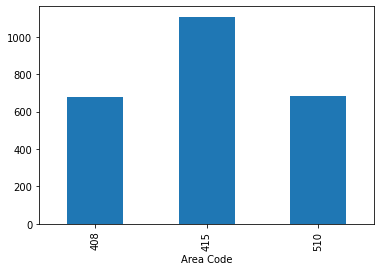

In [7]:
data.groupby('Area Code')['Day Mins'].nunique().plot(kind='bar')

<AxesSubplot:ylabel='Day Mins'>

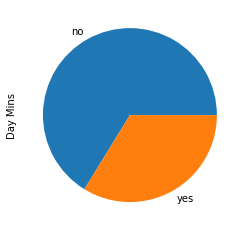

In [8]:
data.groupby('VMail Plan')['Day Mins'].nunique().plot(kind='pie')

### Histograma de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

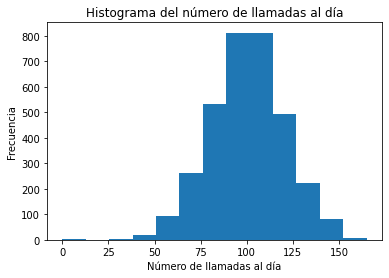

In [9]:
k = int(np.ceil(1+np.log2(len(data))))
plt.hist(data["Day Calls"], bins = k) 
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

### Boxplot

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

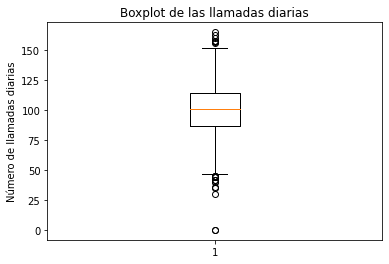

In [10]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

### Dispersión

(300, 2)


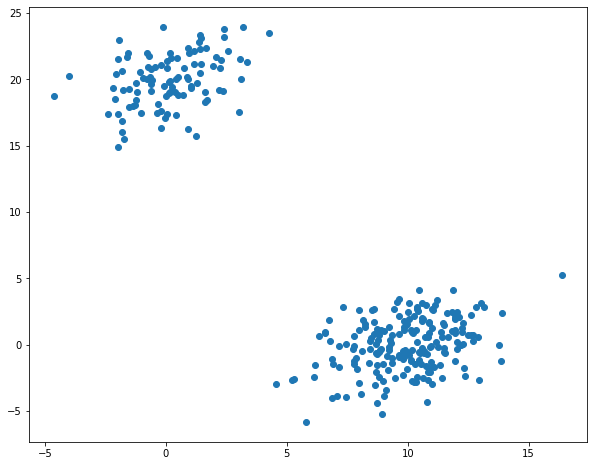

In [11]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [200,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [100,])
X = np.concatenate((a,b))
print(X.shape)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])
plt.show()

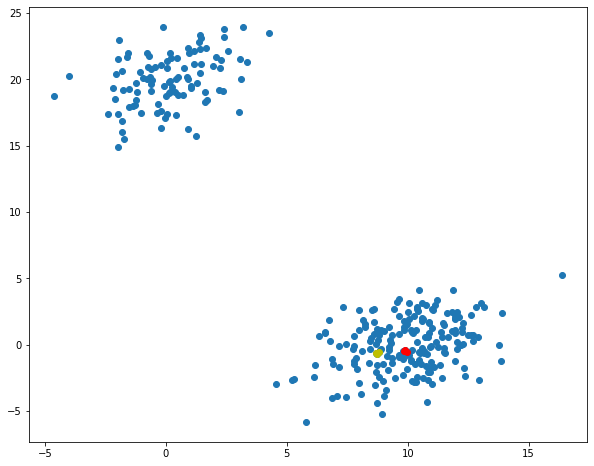

In [12]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1])##pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r')##destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y')##destacamos en amarillo el segundo cluster
plt.show()

## Datos 3D

In [13]:
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D

In [14]:
data = pd.read_csv("movies.csv", sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


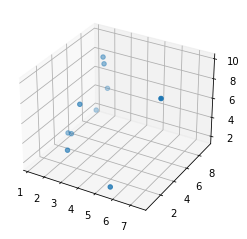

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs=data["harry_potter"])

# Cosas más elaboradas --> Clustering jerárquico

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage

(150, 2)


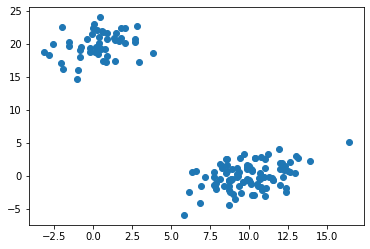

In [17]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [18]:
Z = linkage(X, "ward")

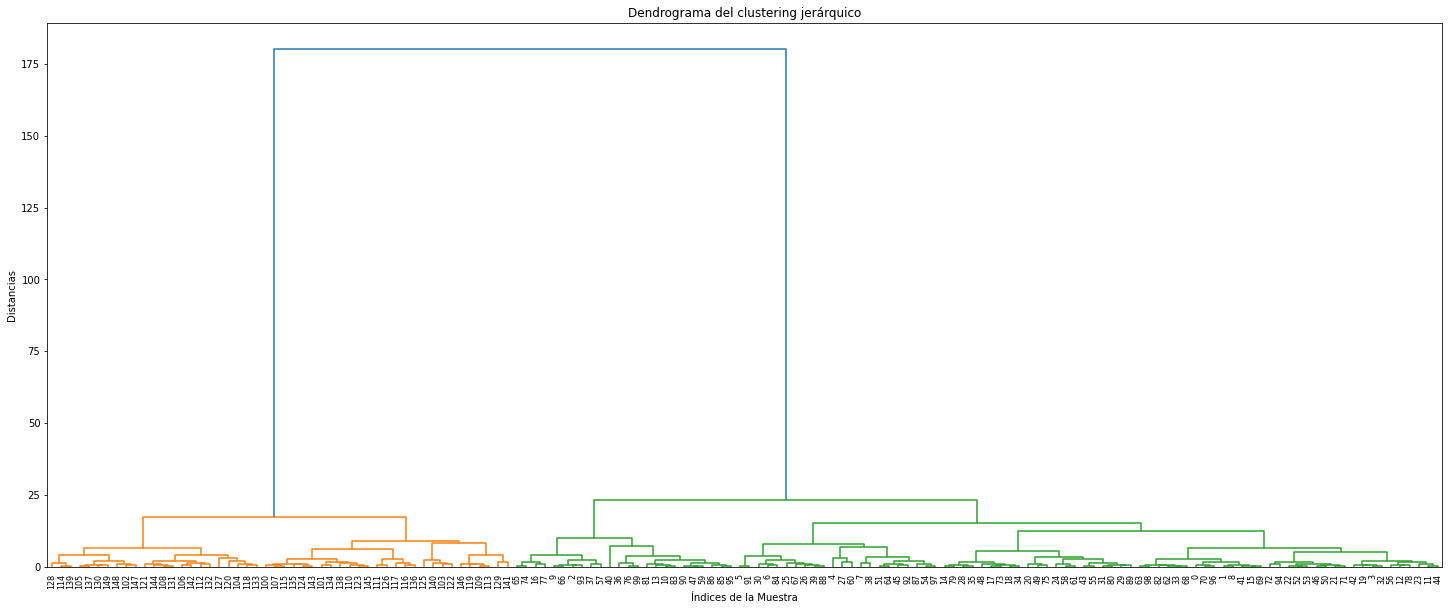

In [19]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

### Barras y error

[0 1 2]
[0.3, 1.3, 2.3]


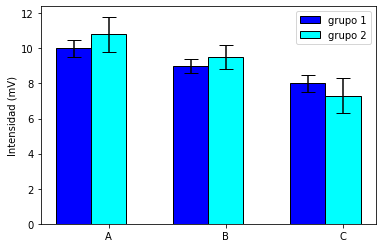

In [20]:
barWidth = 0.3
bars1 = [10, 9, 8.]
bars2 = [10.8, 9.5, 7.3]
 
# barras de error
yer1 = [0.5, 0.4, 0.5]
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
print(r1)
r2 = [x + barWidth for x in r1]
print(r2)
 
# barras grupo 1
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='grupo 1')
 
# barras grupo 2
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='grupo 2')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C'])
plt.ylabel('Intensidad (mV)')
plt.legend()

plt.show()